In [20]:
import pandas as pd
import math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

In [21]:
#Reading data
df = pd.read_csv('PETR4.SA.csv', header=0, index_col='Date', parse_dates=True)
print(df.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-09-16  18.430000  18.719999  18.170000  18.450001  17.225540  33961100
2013-09-17  18.590000  18.600000  18.299999  18.530001  17.300230  18948400
2013-09-18  18.410000  19.000000  18.160000  18.900000  17.645674  30957700
2013-09-19  18.959999  19.309999  18.760000  19.160000  17.888418  24470200
2013-09-20  19.090000  19.180000  18.780001  18.940001  17.683020  18955300


In [22]:
# High - Low percentage
df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
# Percentage change
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

df = df[['Close', 'HL_PCT', 'PCT_change', 'Volume']]


In [23]:
# Select wich col will be used to forecast the prices
forecast_col = 'Close'
# Fill the NaN values with -99999, the algorithm will ignore these values
df.fillna(-99999, inplace=True)

# The number of predictions that will be done
forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

# Put all the values up the forecast_out number
df['label'] = df[forecast_col].shift(-forecast_out)

13


In [24]:
X = np.array(df.drop(['label'], 1))
# Processing the entire data ignoring the 'label' col
X = preprocessing.scale(X)

# Array of predictions 
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

In [25]:
# Setting up the machine learning algorithm
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


# This is an example to use with big data, we don't need to train data every time we run the program
# with Pickle we can save the data trained before.
##clf = LinearRegression(n_jobs=-1)
##clf.fit(X_train, y_train)
##with open('linearregression.pickle', 'wb') as f:
##    pickle.dump(clf, f)

# And now we read the file created by pickle
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

# This is an interesting value, this determines how much our algorithm can be "trusted" in percentage
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8207421271348417


In [26]:
# Predicting some values
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[18.05832822 18.78399509 18.19473054 18.78409045 18.84048094 18.28818431
 18.40067368 18.5988051  18.8047416  18.11847462 18.54127022 18.40731917
 18.43331584] 0.8207421271348417 13


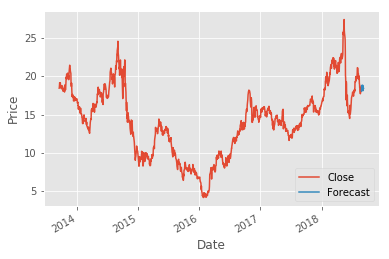

In [27]:

# Plotting a graph with real prices and forecasts generated by our algorithm 
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] =  [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [29]:
!jupyter nbconvert --to script regressionintro.ipynb


[NbConvertApp] Converting notebook regressionintro.ipynb to script
[NbConvertApp] Writing 2794 bytes to regressionintro.py
